In [511]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, kstest, norm, levene, ttest_ind, ttest_1samp, f_oneway, chi2_contingency, kruskal


In [512]:
df = pd.read_csv('yulu.csv')

In [513]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [514]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [515]:
print(df['datetime'].min())
print(df['datetime'].max())

2011-01-01 00:00:00
2012-12-19 23:00:00


In [516]:
num_columns = ['temp','atemp', 'humidity','windspeed','casual','registered','count']

In [517]:
cat_columns = ['season', 'holiday' ,'workingday' ,'weather']

#Calculating the % unique values in each categorical variable
df_cat = df[cat_columns].melt().groupby(['variable','value'])[['value']].count()/len(df)*100

df_cat

value
variable   value           
holiday    0      97.143120
           1       2.856880
season     1      24.673893
           2      25.105640
           3      25.105640
           4      25.114826
weather    1      66.066507
           2      26.033437
           3       7.890869
           4       0.009186
workingday 0      31.912548
           1      68.087452

## Observations from the counts of the different types of variables:
1. The **Datetime** variables shows that we have the data from **01/01/2011** till **12/19/2012**.
2. From the **holiday** variable, we can see that most people (97%) prefered to take the bikes on working days whereas only 2.8% of the people took the bike on the working days.
3. **Season** variable shows that the data is equally distributed amongst different seasons where all 4 seasons have close to 25% of the data points.
4. **Weather** variable shows that people took the bike out most on the day when the weather was most clear with 66% datapoints, 2nd is with mist+cloudy weather (26% datapoints). The lowest is the Heavy Rain + Ice Pallets + thunderstorm weather with almost 0% datapoints. This is self explanatory because it's almost impossible to use a bike in extreme weather conditions.
5. **Workingday** variable tells us that the most people prefered taking out bikes when it was a working day with 68% of datapoints and 31.91% people took out the bike when it was a non-working day.

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [519]:
df.describe(include = 'all').T

/var/folders/gc/qpf88__d0dl785k0jz20snmw0000gn/T/ipykernel_13018/3037142830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,10886,10886,2011-01-01,1,2011-01-01,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,10886.0,NaN,NaT,NaN,NaT,NaT,2.506614,1.116174,1.0,2.0,3.0,4.0,4.0
holiday,10886.0,NaN,NaT,NaN,NaT,NaT,0.028569,0.166599,0.0,0.0,0.0,0.0,1.0
workingday,10886.0,NaN,NaT,NaN,NaT,NaT,0.680875,0.466159,0.0,0.0,1.0,1.0,1.0
weather,10886.0,NaN,NaT,NaN,NaT,NaT,1.418427,0.633839,1.0,1.0,1.0,2.0,4.0
temp,10886.0,NaN,NaT,NaN,NaT,NaT,20.23086,7.79159,0.82,13.94,20.5,26.24,41.0
atemp,10886.0,NaN,NaT,NaN,NaT,NaT,23.655084,8.474601,0.76,16.665,24.24,31.06,45.455
humidity,10886.0,NaN,NaT,NaN,NaT,NaT,61.88646,19.245033,0.0,47.0,62.0,77.0,100.0
windspeed,10886.0,NaN,NaT,NaN,NaT,NaT,12.799395,8.164537,0.0,7.0015,12.998,16.9979,56.9969
casual,10886.0,NaN,NaT,NaN,NaT,NaT,36.021955,49.960477,0.0,4.0,17.0,49.0,367.0


In [520]:
# Checking for outliers by subtracting mean from median

df.describe().loc['mean'] - df.describe().loc['50%']

season        -0.493386
holiday        0.028569
workingday    -0.319125
weather        0.418427
temp          -0.269140
atemp         -0.584916
humidity      -0.113540
windspeed     -0.198605
casual        19.021955
registered    37.552177
count         46.574132
dtype: float64

## Observations:
- We can see that there are a few outliers in casual, registered and count variables.

In [521]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

## Checking for Missing Values

In [522]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [523]:
# Data Shape

print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns')

The data has 10886 rows and 12 columns


## Observations on shape of data, data types of all the attributes :
1. We can see that the data has a mix of Int and Float variables. There is only 1 variable of datetime which is an object which we have converted to datetime object.
2. There are 4 categorical variables in our data - season, holiday, workingday and weather which are converted into numeric features.
3. There are 7 numerical variables - temp, atemp, humidity, windspeed,casual, registered and count.
4. We can see that there are no null values in our data. 


## Univariate Analysis

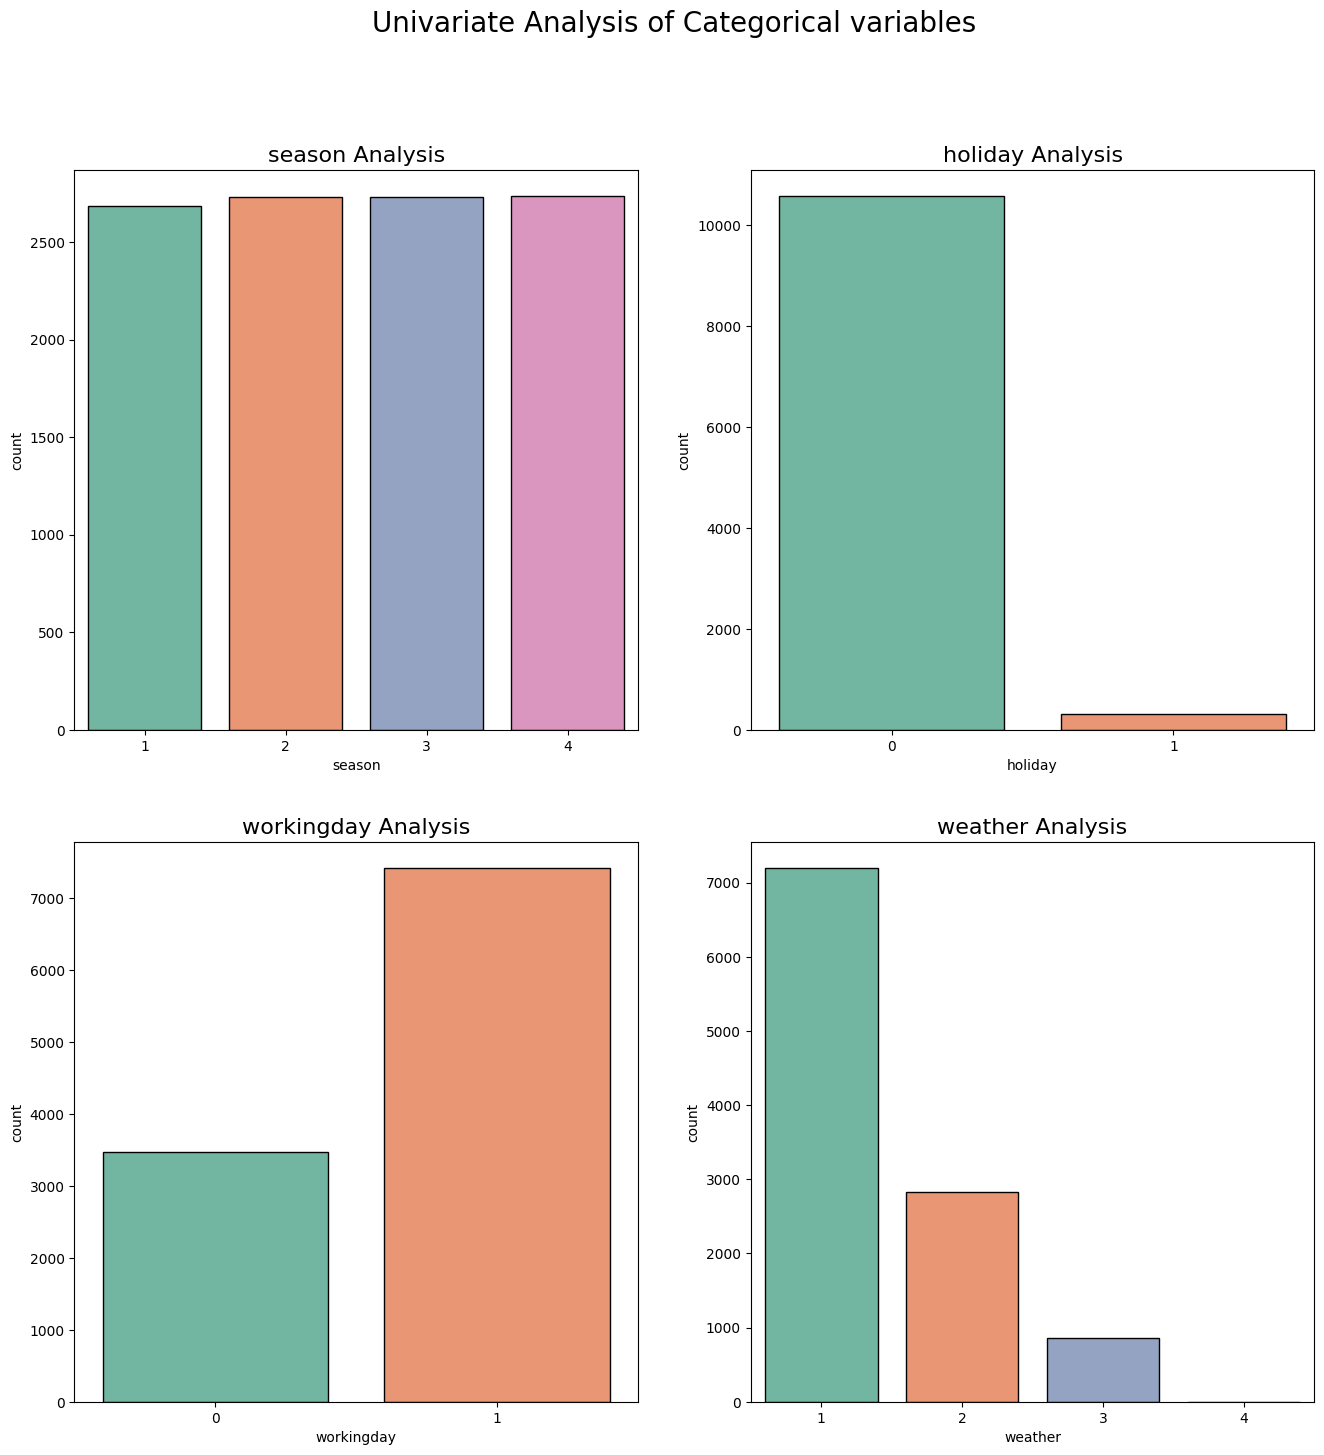

In [524]:
#The below code will generate count plots for all the categorical variables in the data for Univariate Analysis

plt.figure(figsize = (16,16)).suptitle('Univariate Analysis of Categorical variables', fontsize = 20)
count = 0
for i in range(len(cat_columns)):
    plt.subplot(2,2,i+1)
    sns.countplot(data = df,x = cat_columns[i], edgecolor = 'black', palette = 'Set2')
    plt.title(f"{cat_columns[count]} Analysis", fontsize = 16)
    count += 1


## Observations on univariate analysis of Numerical Variables:
1. We can see that the Season variables are evenly distributed amongst 4 season each with almost 25% of the datapoints.
2. From the holiday plot, we can see that people tend to rent bikes more on the weekdays and not the holidays.
3. From the workingday plot, we can infer that people tend to rent bikes more on the working days and less so on the non-working days.
4. The maximum number of people prefer to rent the bikes when the weather is clear or has a few clouds/partly cloudy which is pretty normal.
5. We can see that there are almost no people who prefer to rent the bikes when there are heavy rains or when there is a thunderstorm

In [525]:
print(num_columns)

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']


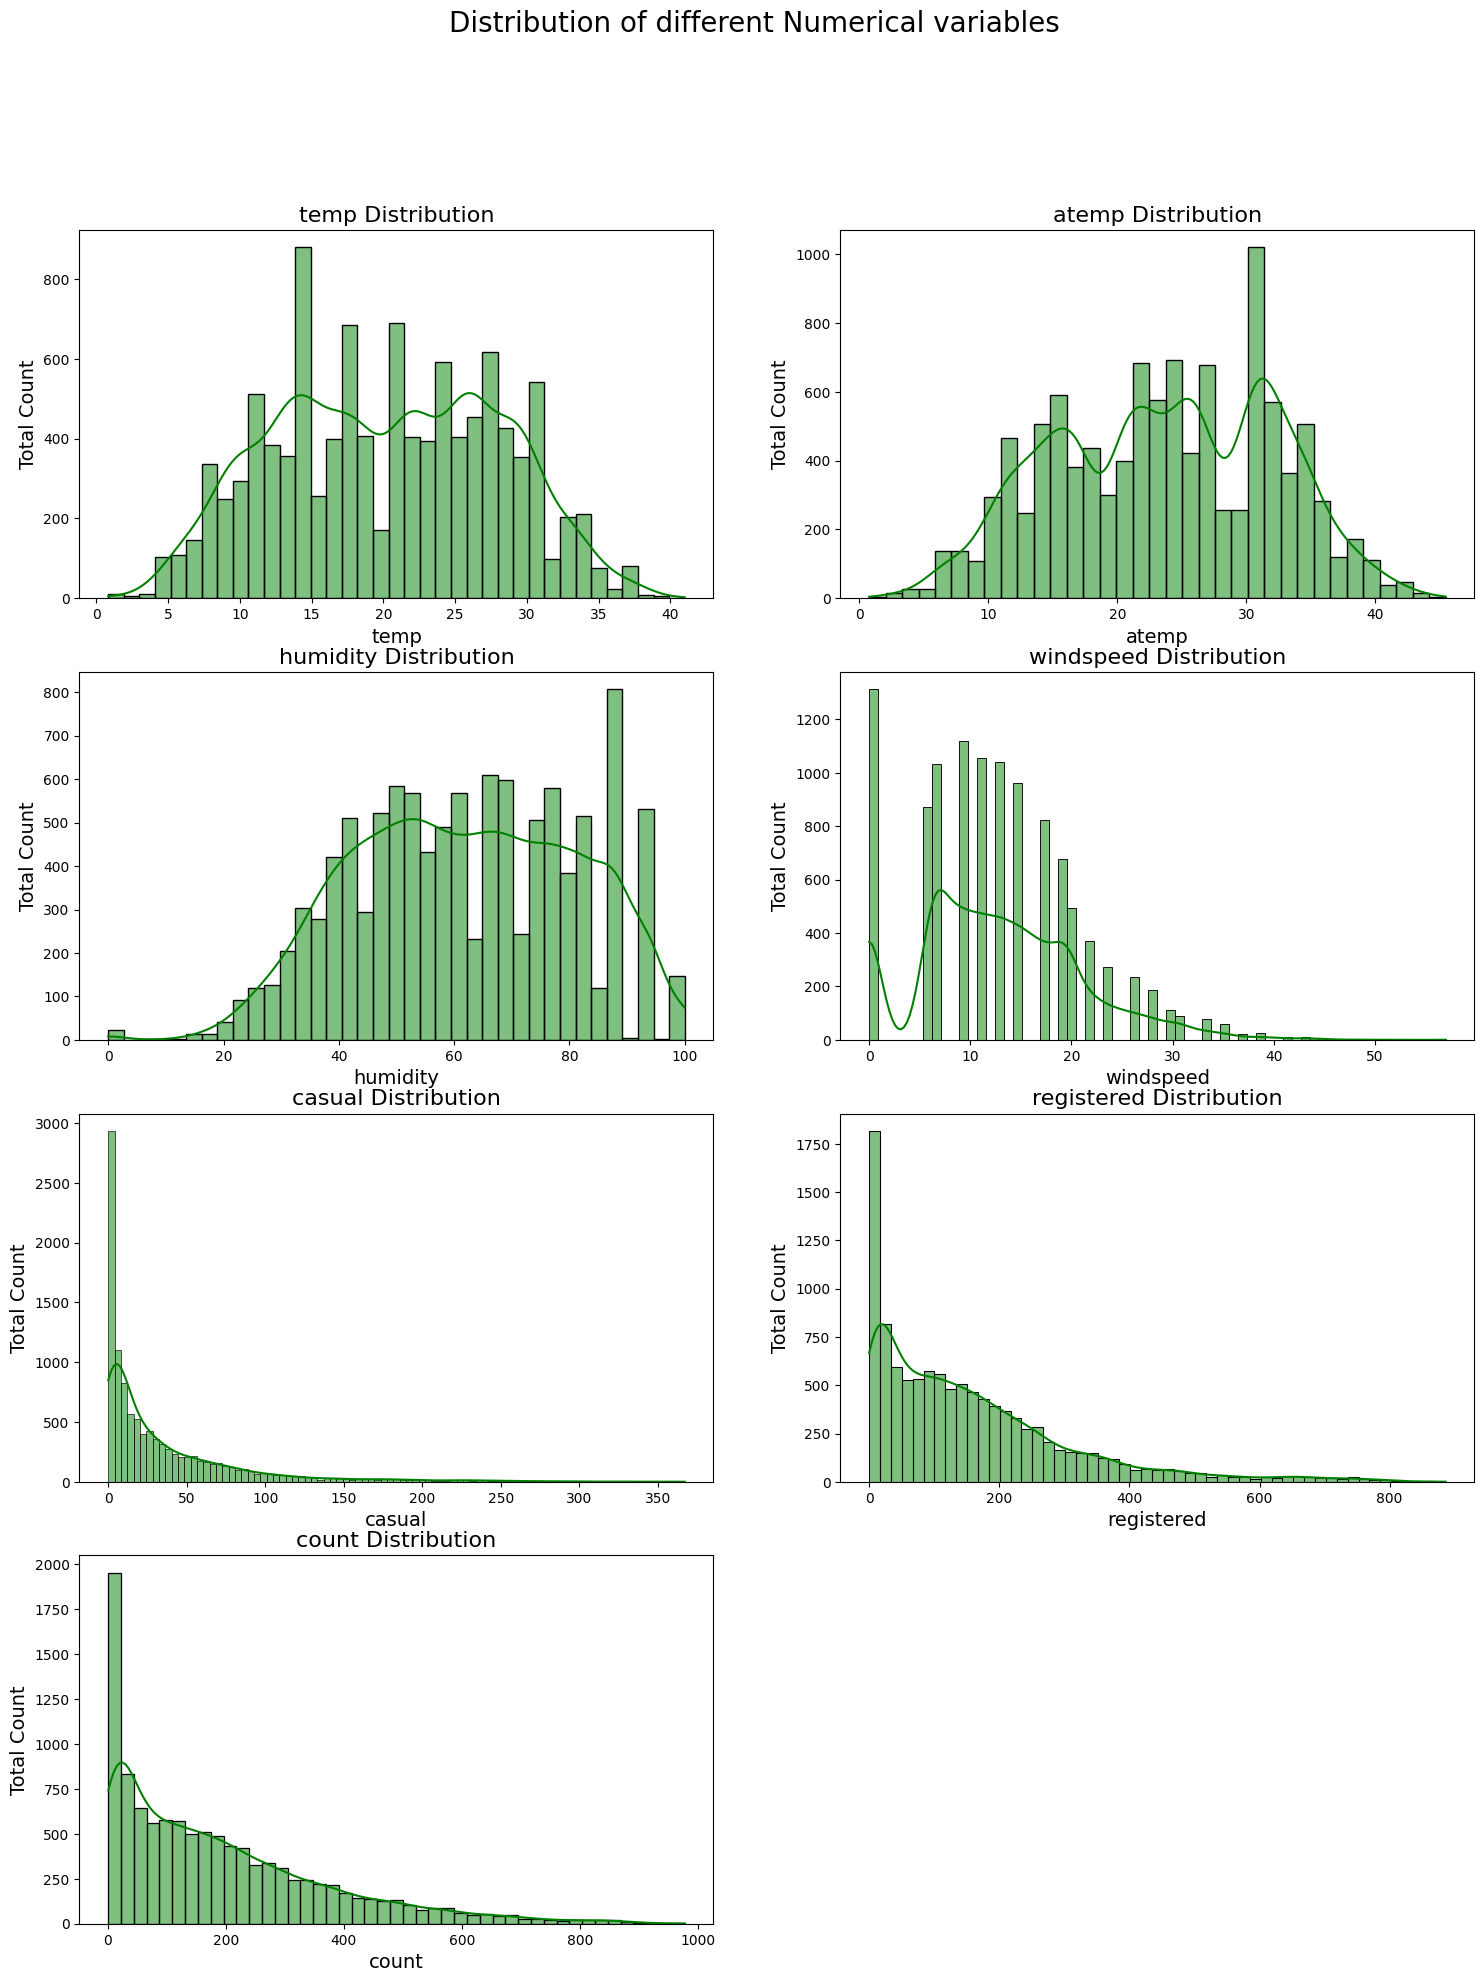

In [526]:
#The below code will generate histogram plots for all the numerical variables in the data.

plt.figure(figsize = (18,22)).suptitle('Distribution of different Numerical variables', fontsize = 20)
count = 0
for i in range(len(num_columns)):
    plt.subplot(4,2,i+1)
    sns.histplot(data = df,x = num_columns[i], color = 'g', kde = True)
    plt.xlabel(num_columns[i],fontsize =14)
    plt.ylabel('Total Count', fontsize = 14)
    plt.title(f"{num_columns[count]} Distribution", fontsize = 16)
    count += 1

## Observations on distributions of Continous variables
1. We can see that the variables - Casual, Registered and Count are skewed to the right.
2. By looking at the distribution for windspeed, we can see that it follows a binomial distribution. Because there were days when there were 0 windspeed and on the other days there was low - moderate windspeed.
3. The Temp, Atemp and Humidity follows (somewhat) a Normal distribution. Because most of their data points are centered around the mean however we will still try to test this hypothesis by using Shapiro.

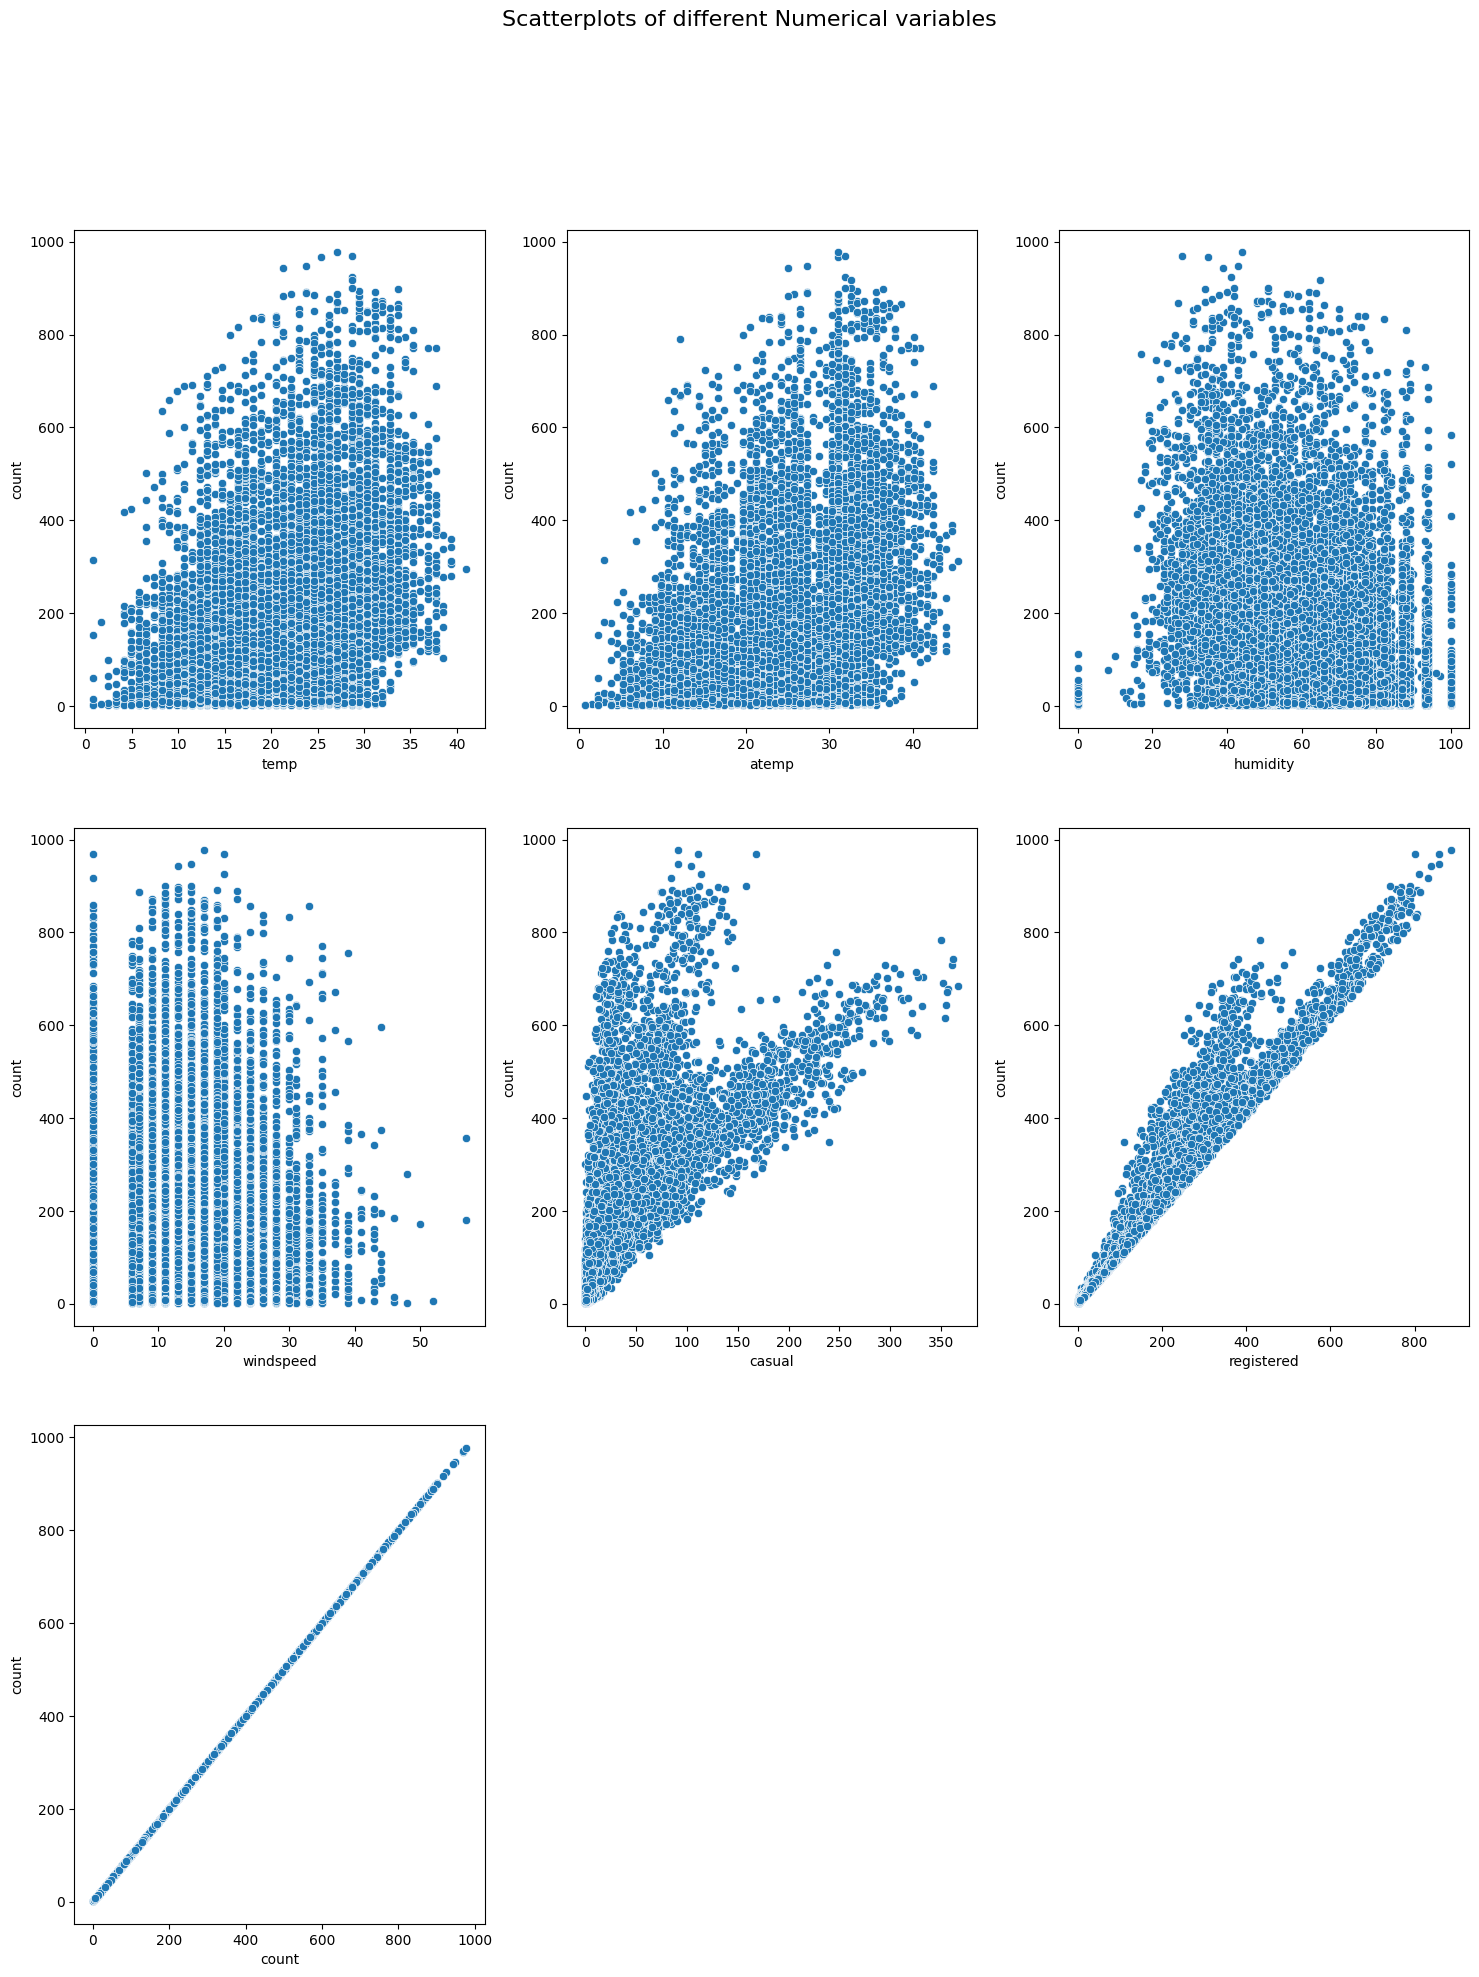

In [527]:
plt.figure(figsize = (18,22)).suptitle('Scatterplots of different Numerical variables', fontsize = 16)

for i in range(len(num_columns)):
    plt.subplot(3,3,i+1)
    sns.scatterplot(data = df, x = num_columns[i], y = 'count')
plt.show()

## Observations on the above Scatterplots:
1. Whenever the humidity is less than 20, number of bikes rented is very very low.
2. Whenever the temperature is less than 10, number of bikes rented is less.
3. Whenever the windspeed is greater than 35, number of bikes rented is less.

/var/folders/gc/qpf88__d0dl785k0jz20snmw0000gn/T/ipykernel_13018/1465973159.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'Blues')


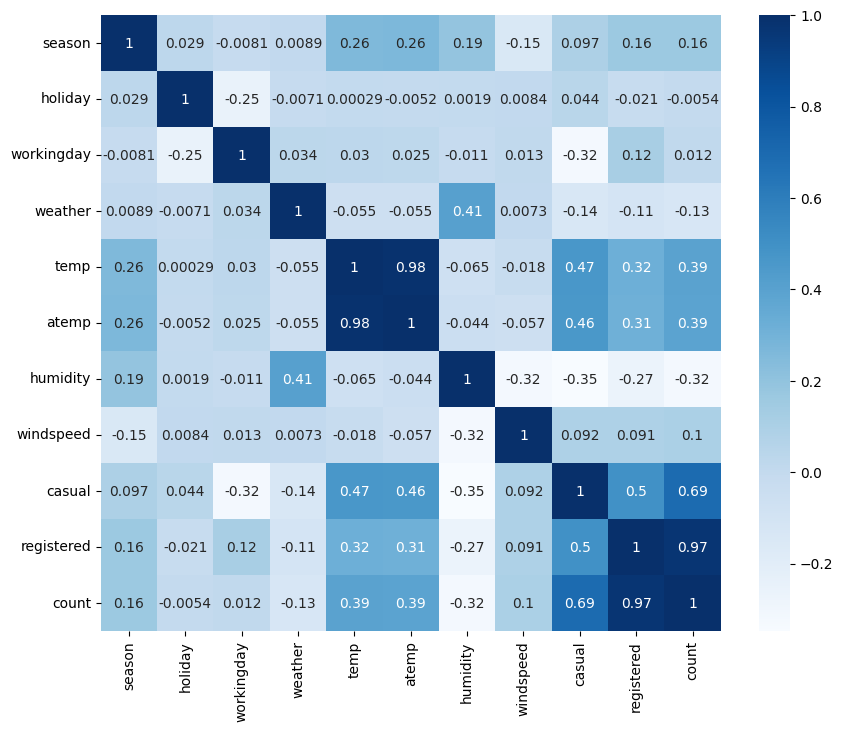

In [528]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

## Bi Variate Analysis

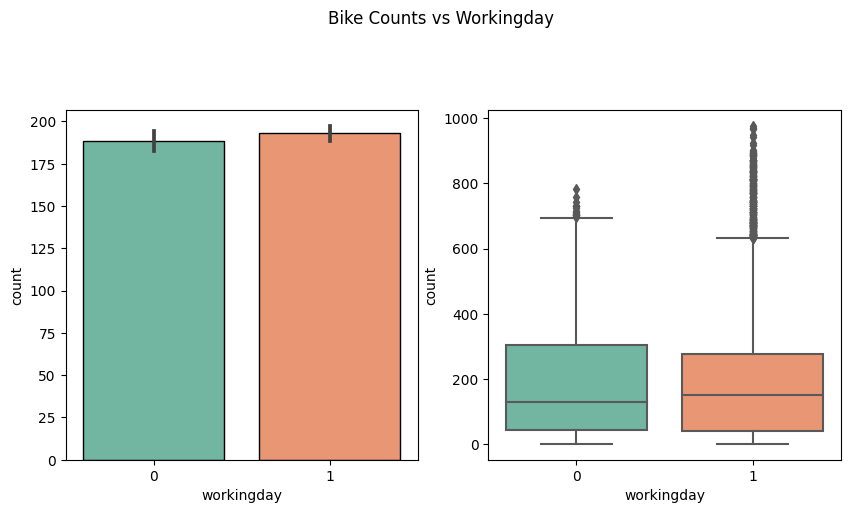

In [529]:
plt.figure(figsize = (10,10)).suptitle('Bike Counts vs Workingday')

plt.subplot(2,2,1)
sns.barplot(data = df, x = 'workingday', y = 'count', edgecolor = 'black', palette= 'Set2')

plt.subplot(2,2,2)
sns.boxplot(data = df, x = 'workingday', y = 'count',palette= 'Set2')
plt.show()

In [530]:
# Mean of count variable for working and non-working days
df.groupby(['workingday'])[['count']].mean()

,count
workingday,
0,188.506621
1,193.011873


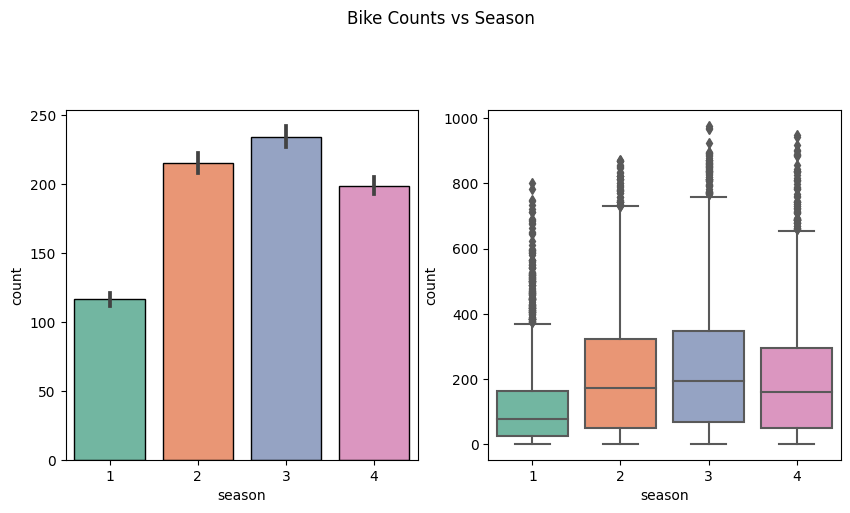

In [531]:
plt.figure(figsize = (10,10)).suptitle('Bike Counts vs Season')

plt.subplot(2,2,1)
sns.barplot(data = df, x = 'season', y = 'count', edgecolor = 'black', palette= 'Set2')

plt.subplot(2,2,2)
sns.boxplot(data = df, x = 'season', y = 'count', palette = 'Set2')
plt.show()

In [532]:
# Mean of count variable for different seasons
df.groupby(['season'])[['count']].mean()

,count
season,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


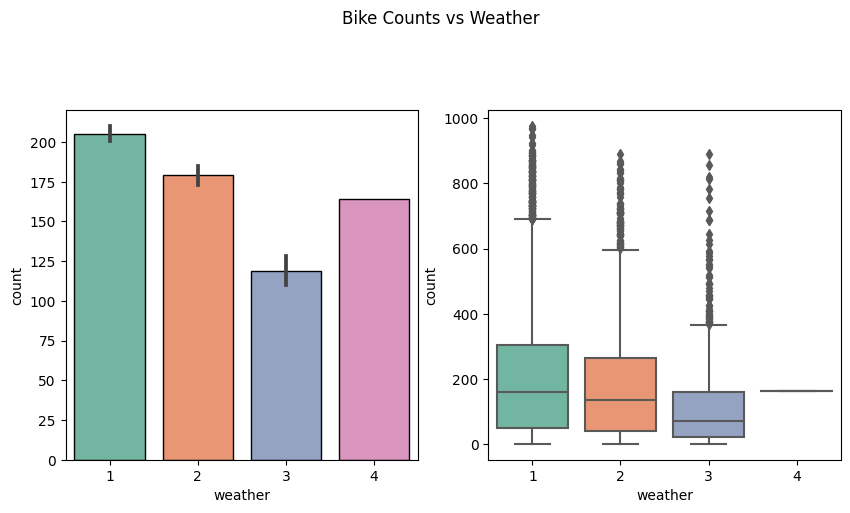

In [533]:
plt.figure(figsize = (10,10)).suptitle('Bike Counts vs Weather')

plt.subplot(2,2,1)
sns.barplot(data = df, x = 'weather', y = 'count', edgecolor = 'black', palette= 'Set2')

plt.subplot(2,2,2)
sns.boxplot(data = df, x = 'weather', y = 'count', palette = 'Set2')
plt.show()

In [534]:
# Mean of count variable for different weathers
df.groupby(['weather'])[['count']].mean()

,count
weather,
1,205.236791
2,178.955540
3,118.846333
4,164.000000


## Bi Variate Analysis Observations:
**Bike Counts vs Working day:**
1. From this bar plot we can observe that the mean counts of total registered and casual bikes are the almost the same on working day and non-working day.
2. From the box plot we can infer that there are more outliers in our counts of registered and casual bikes on the working day than there are on the non-working day.

**Bike Counts vs Season:**
1. From the bar plot we can see that the mean value of the total registered and casual bikes when it's the fall season(season 3) and second highest mean value of the counts in the summer season (season 2).
2. The lowest mean value of the counts is for the spring (season 1).
2. The boxplot shows us that there highest outlier values for season 1 for count variable with season 4 being the 2nd highest for outlier values of the count variables.

**Bike Counts vs Weather:**
1. The highest mean value of the counts of bikes is for the weather 1, i.e. when the weather was clear, has few clouds or partly cloudy. This comes comes as a no surprise because it is the ideal weather to ride a bike.
2. The second highest mean value of the counts of bikes is for the weather 2 when it was Misty and cloudy or with very few clouds. 
3. For weather 4 which is heavy rain or thunderstorm or snow and fog, we only have 1 data point because the conditions are not idea for bike rides.
3. From the boxplots we can see that the highest number of outliers in the count variable is for the the weather 3. 

## QQPlot to check if our temp, atemp and humidity variables follows a Gaussian distribution

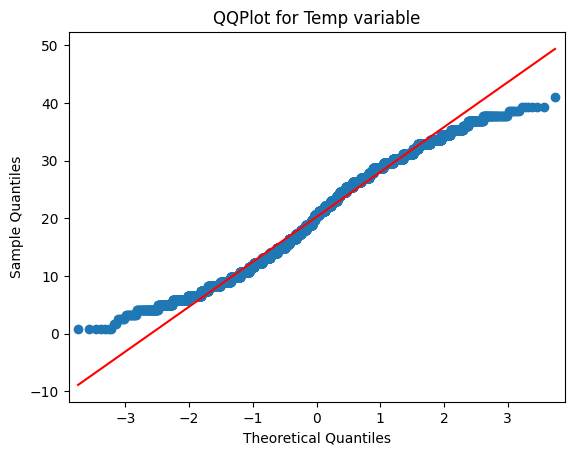

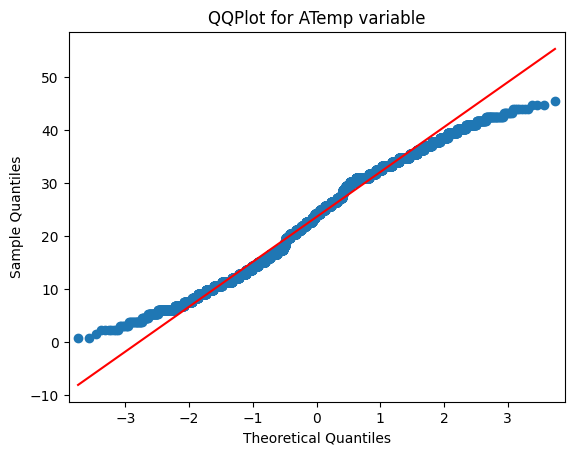

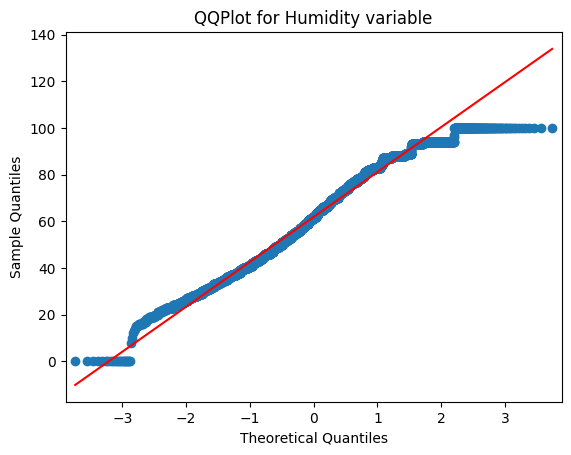

In [535]:
qqplot(df['temp'], line = 's')
plt.title("QQPlot for Temp variable")
plt.show()

qqplot(df['atemp'], line = 's')
plt.title("QQPlot for ATemp variable")
plt.show()

qqplot(df['humidity'], line = 's')
plt.title("QQPlot for Humidity variable")
plt.show()

## Observations from the QQPlots:
1. From the above QQPlots we can see that the QQPlot for temp and temp variable follows a somewhat Gaussian/Normal distribution. We will be checking our Hypothesis by running a few tests like Shapiro and Kstest to prove our assumptions.
2. For the humidity QQPlot, we can see a lot of the points actually fall on the standard line however we still cannot say if it follows a Gaussian distribution or not until we test our hypothesis.

## Hypothesis testing using Shapiro to check if the numeric variables in our data follows Gaussian distribution

In [537]:
def hypoth_test_gaussian(col):
    
    sample = col.sample(100) # taking the sample of the variable
    sample_mean = col.mean() # taking the mean of the sample
    sample_std = col.std() # taking the std deviation of the sample 
    
    
    t_stat_shap,p_val_shap = shapiro(sample)
    
    t_stat_ks, p_val_ks = kstest(sample, norm.cdf, args = (sample_mean, sample_std))

    
    return p_val_shap, p_val_ks

## Setting up our Null and Alternate Hypothesis

## ATemp variable
**Null Hypothesis (H0):** Data is Gaussian <br>
**Alternate Hypothesis (Ha):** Data is not Gaussian<br>
**Significance level (alpha):** 0.05

In [538]:
p_val_shap, p_val_ks = hypoth_test_gaussian(df['temp'])

print(f"P value from Shapiro test for temp variable: {p_val_shap}")
if p_val_shap < 0.05:
    print("Reject H0 after using Shapiro test")
    print("Data is not Gaussian as per Shapiro test")
else:
    print("Fail to reject H0 after using Shapiro")
    print("Data is Gaussian as per Shapiro test")

print(f"\nP value from kstest for temp variable: {p_val_ks}")
if p_val_ks < 0.05:
    print("Reject H0 after using kstest")
    print("Data is not Gaussian as per kstest")
else:
    print("Fail to reject H0 after using kstest")
    print("Data is Gaussian as per kstest")

P value from Shapiro test for temp variable: 5.969225458102301e-05
Reject H0 after using Shapiro test
Data is not Gaussian as per Shapiro test

P value from kstest for temp variable: 0.06303235667406301
Fail to reject H0 after using kstest
Data is Gaussian as per kstest


## ATemp variable
**Null Hypothesis (H0):** Data is Gaussian<br>
**Alternate Hypothesis (Ha):** Data is not Gaussian<br>
**Significance level (alpha):** 0.05

In [539]:
p_val_shap, p_val_ks = hypoth_test_gaussian(df['atemp'])

print(f"P value from Shapiro test for atemp variable: {p_val_shap}")
if p_val_shap < 0.05:
    print("Reject H0 after using Shapiro test")
    print("Data is not Gaussian as per Shapiro test")
else:
    print("Fail to reject H0 after using Shapiro test")
    print("Data is Gaussian as per Shapiro test")

print(f"\nP value from kstest for atemp variable: {p_val_ks}")
if p_val_ks < 0.05:
    print("Reject H0 after using kstest")
    print("Data is not Gaussian as per kstest")
else:
    print("Fail to reject H0 after using kstest")
    print("Data is Gaussian as per kstest")

P value from Shapiro test for atemp variable: 0.025317031890153885
Reject H0 after using Shapiro test
Data is not Gaussian as per Shapiro test

P value from kstest for atemp variable: 0.13951732074324097
Fail to reject H0 after using kstest
Data is Gaussian as per kstest


## Humidity variable
**Null Hypothesis (H0):** Data is Gaussian <br>
**Alternate Hypothesis (Ha):** Data is not Gaussian<br>
**Significance level (alpha):** 0.05

In [540]:
p_val_shap, p_val_ks = hypoth_test_gaussian(df['humidity'])

print(f"P value from Shapiro test for humidity variable: {p_val_shap}")
if p_val_shap < 0.05:
    print("Reject H0 after using Shapiro test")
    print("Data is not Gaussian as per Shapiro test")
else:
    print("Fail to reject H0 after using Shapiro test")
    print("Data is Gaussian as per Shapiro test")

print(f"\nP value from kstest for atemp variable: {p_val_ks}")
if p_val_ks < 0.05:
    print("Reject H0 after using kstest")
    print("Data is not Gaussian as per kstest")
else:
    print("Fail to reject H0 after using kstest")
    print("Data is Gaussian as per kstest")

P value from Shapiro test for humidity variable: 0.013685520738363266
Reject H0 after using Shapiro test
Data is not Gaussian as per Shapiro test

P value from kstest for atemp variable: 0.02180978940450809
Reject H0 after using kstest
Data is not Gaussian as per kstest


## Levene's test to check if the Variance of the Temp, Atemp and Humidity variables is same
**Null Hypothesis (H0):** Same Variance of Numerical Variables<br>
**Alternate Hypothesis (Ha):** Different Variance of Numerical Variables<br>
**Significance level (alpha):** 0.05

In [541]:
# taking samples of numerical variables

temp_subset = df['temp'].sample(100)
atemp_subset = df['atemp'].sample(100)
humidity_subset = df['humidity'].sample(100)

In [542]:
t_stat, p_val = levene(temp_subset,atemp_subset,humidity_subset)
print(p_val)
if(p_val < 0.05):
    print("Reject H0")
    print("Variances are different")
else:
    print("Fail to reject H0")
    print("Variances are the same")

1.0448732691794163e-19
Reject H0
Variances are different


## Levene's test to check if the Variance of the Casual, Registered and Count variables is same
**Null Hypothesis (H0):** Same Variance of Numerical Variables <br>
**Alternate Hypothesis (Ha):** Different Variance of Numerical Variables<br>
**Significance level (alpha):** 0.05

In [543]:
# taking samples of numerical variables

casual_subset = df['casual'].sample(100)
reg_subset = df['registered'].sample(100)
count_subset = df['count'].sample(100)

In [544]:
t_stat, p_val = levene(casual_subset,reg_subset,count_subset)
print(p_val)
if(p_val < 0.05):
    print("Reject H0")
    print("Variances are different of the numerical variables")
else:
    print("Fail to reject H0")
    print("Variances are the same of the numerical variables")

9.531873024770745e-11
Reject H0
Variances are different of the numerical variables


## Hypothesis Testing to check if Working Day has an effect on number of electric cycles rented

**Null Hypothesis (H0):** Working Day has no affect on the number of cycles rented <br>
**Alternate Hypothesis (Ha):** Working Day has an affect on the number of cycles rented <br>
**Significance Level (alpha):** 0.05

In [545]:
workingday = df[df['workingday'] == 1]['count']
non_workingday = df[df['workingday'] == 0]['count']

In [546]:
t_stat,p_val = ttest_ind(workingday,non_workingday)

In [547]:
print(f"P value = {p_val}")
if p_val < 0.05:
    print('Reject H0')
    print("Working Day has an affect on number of electric cycles rented")
else:
    print("Fail to reject H0")
    print("Working Day has no affect on number of electric cycles rented")

P value = 0.22644804226361348
Fail to reject H0
Working Day has no affect on number of electric cycles rented


## Observation:

Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.

## Hypothesis Testing using Annova and Kruskal to check if No. of cycles rented is similar or different in different
**1. Weather**<br>
**2. Season**

**Checking for Variance in different groups in weather and season columns**

In [548]:
std_weather = df.groupby('weather')[['count']].agg(np.std)

In [549]:
std_weather**2

,count
weather,
1,35328.798463
2,28347.248993
3,19204.775893
4,NaN


In [550]:
std_seasons = df.groupby('season')[['count']].agg(np.std)

In [551]:
std_seasons**2

,count
season,
1,15693.568534
2,36867.011826
3,38868.517013
4,31549.720317


**Assumptions of Annova**
1. Data should be Gaussian. We know from our above QQplots, that our count variable is not Gaussian or Normally distributed.
2. Data should be Independent. 
3. Equal Variance in each group. We can see that the std/variance is also not equal for count variables when we grouped it by different weathers and seasons.


In [552]:
weather1 = df[df['weather'] == 1]['count']
weather2 = df[df['weather'] == 2]['count']
weather3 = df[df['weather'] == 3]['count']
weather4 = df[df['weather'] == 4]['count']

In [553]:
season1 = df[df['season'] == 1]['count']
season2 = df[df['season'] == 2]['count']
season3 = df[df['season'] == 3]['count']
season4 = df[df['season'] == 4]['count']

### Annova Test

**Null Hypothesis (H0):** No. of cycles rented is similar in different weather and season conditions<br>
**Alternate Hypothesis (Ha):** No. of cycles rented is not similar in different weather and season conditions<br>
**Significance level (alpha):** 0.05

In [554]:
t_stat,p_val = f_oneway(weather1,weather2,weather3,weather4,season1,season2,season3,season4)

print(f"P value for Annova test is: {p_val}")
if p_val< 0.05:
    print("Reject H0")
    print("No. of cycles rented is not similar in different weather and season conditions")
else:
    print("Fail to reject H0")
    print("No. of cycles rented is similar in different weather and season conditions")

P value for Annova test is: 2.8074771742434642e-185
Reject H0
No. of cycles rented is not similar in different weather and season conditions


### Kruskal Wallis Test

**Null Hypothesis (H0):** No. of cycles rented is similar in different weather and season conditions<br>
**Alternate Hypothesis (Ha):** No. of cycles rented is not similar in different weather and season conditions<br>
**Significance level (alpha):** 0.05

In [555]:
# We are running this test because assumptions of Annova failed

t_stat,p_val = kruskal(weather1,weather2,weather3,weather4,season1,season2,season3,season4)

print(f"P value for Annova test is: {p_val}")
if p_val< 0.05:
    print("Reject H0")
    print("No. of cycles rented is not similar in different weather and season conditions")
else:
    print("Fail to reject H0")
    print("No. of cycles rented is similar in different weather and season conditions")

P value for Annova test is: 4.614440933900297e-191
Reject H0
No. of cycles rented is not similar in different weather and season conditions


## Observations from Annova and Kruskal test:
1. The assumptions for Annova test failed however we still went ahead and ran both Annova and Kruskal tests.
2. Since p-value is less than 0.05 for both Annova and Kruskal, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different weather and season conditions

## Hypothesis testing using Chi Square Contingency to check if weather is dependent on the season

### Assumptions of Chi Square Contingency test:
1. The variables are categorical.
2. Observations are Independent.
3. Each cell of table are exclusive.
4. Expected value should be greater than 5.

## Chi Square Contingency test

**Null Hypothesis (H0):** Weather is independent of the season<br>
**Alternate Hypothesis (H1):** Weather is not independent of the season<br>
**Significance level (alpha):** 0.05

In [556]:
data_table = pd.crosstab(df['season'],df['weather'])

In [557]:
data_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [558]:
t_stat, p_val, dof, expected_val = chi2_contingency(data_table)

print(f"P value for Chi Square contingency test is: {p_val}")
if p_val< 0.05:
    print("Reject H0")
    print("Weather is not independent of the Season")
else:
    print("Fail to reject H0")
    print("Weather is independent of the Season")
    

P value for Chi Square contingency test is: 1.549925073686492e-07
Reject H0
Weather is not independent of the Season


## Insights
- In summer and fall seasons more bikes are rented as compared to other seasons.
- Whenever its a holiday more bikes are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
- Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
- Whenever the humidity is less than 20, number of bikes rented is very very low.
- Whenever the temperature is less than 10, number of bikes rented is less.
- Whenever the windspeed is greater than 35, number of bikes rented is less.

## Recommendations
- In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
- With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
- In very low humid days, company should have less bikes in the stock to be rented.
- Whenever temprature is less than 10 or in very cold days, company should have less bikes.
- Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.